In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [51]:
file_path=("C:\\Users\\shrav\\Downloads\\train_ctrUa4K (1).csv")
l_df=pd.read_csv(file_path)
l_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
l_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [53]:
l_df.drop('Loan_ID',axis=1,inplace=True)

**missing**

In [54]:
for i in l_df.columns:
    if l_df[i].dtypes=="O":
        l_df[i].fillna(l_df[i].mode().iloc[0],inplace=True)
    else:
        median=l_df[i].median()
        l_df[i].fillna(median,inplace=True)

In [55]:
l_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
c=[i for i in dict(l_df.dtypes) if l_df.dtypes[i]=="O"]
c

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [57]:
n=[i for i in dict(l_df.dtypes) if l_df.dtypes[i]!="O"]
n

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [58]:
for i in c:
    a=l_df[i].unique()
    print(i,a)

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


**bar chart**

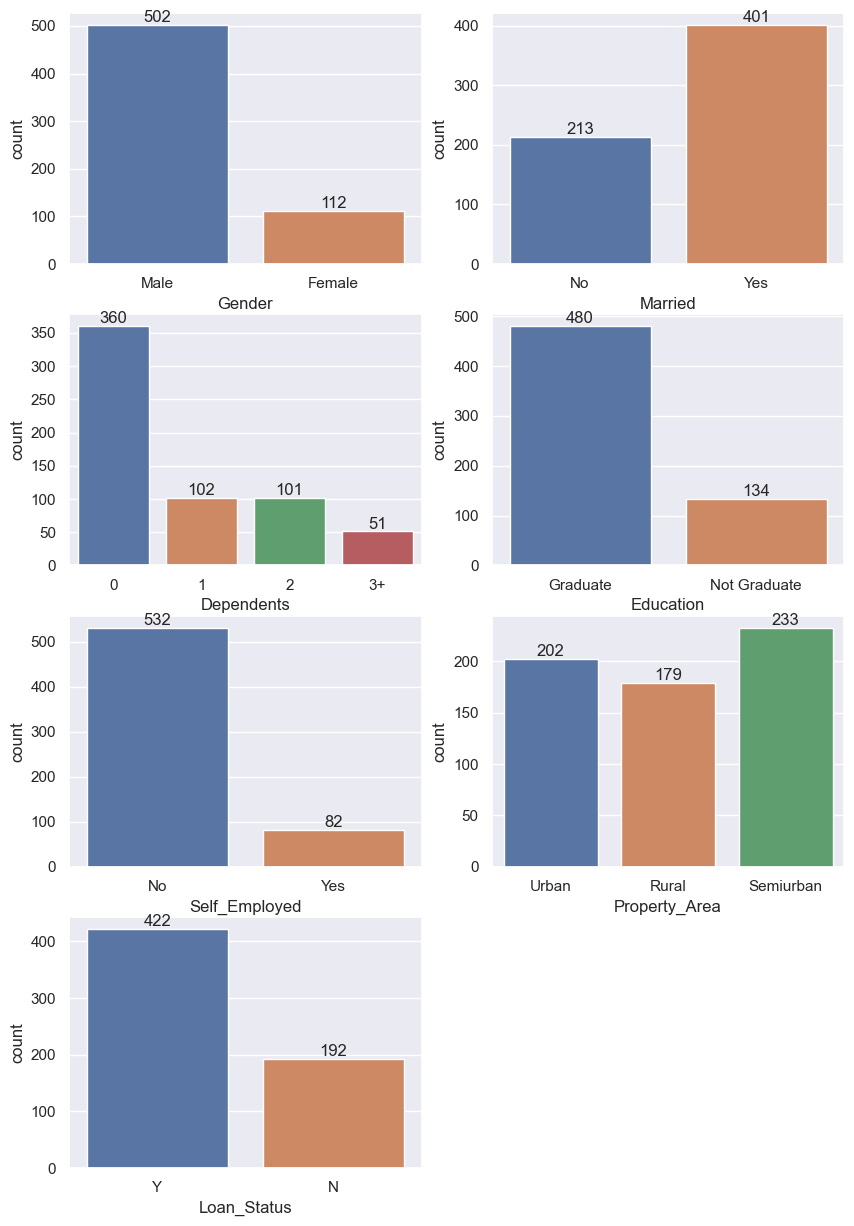

In [59]:
plt.figure(figsize=(10,15))
for i,column in enumerate(c):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(data=l_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

**pie chart**

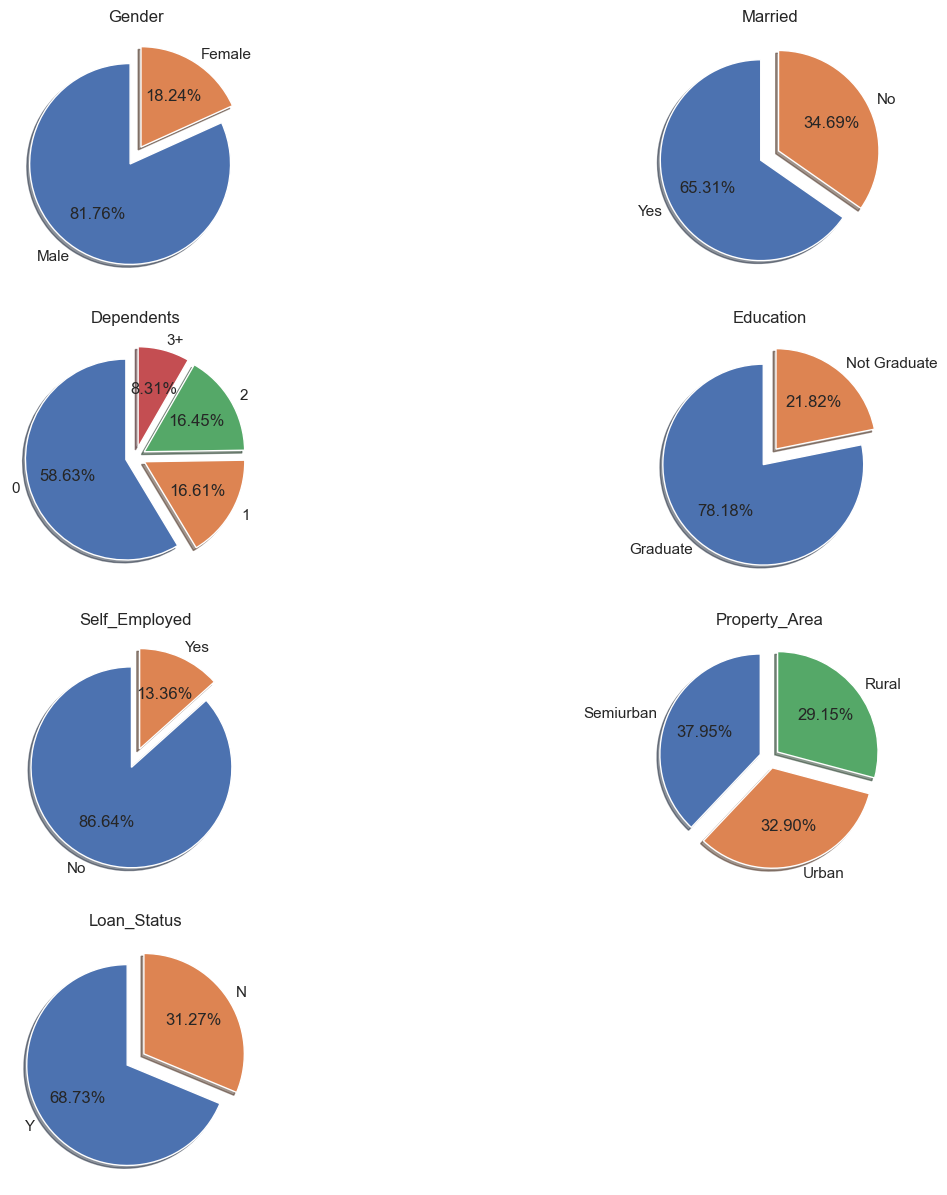

In [60]:
plt.figure(figsize=(15,15))
for i,column in enumerate(c):
    plt.subplot(4,2,i+1)
    l_df[column].value_counts()
    Property=l_df[column].value_counts(normalize=True).keys()
    count=l_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=l_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

**bar and pie chart**

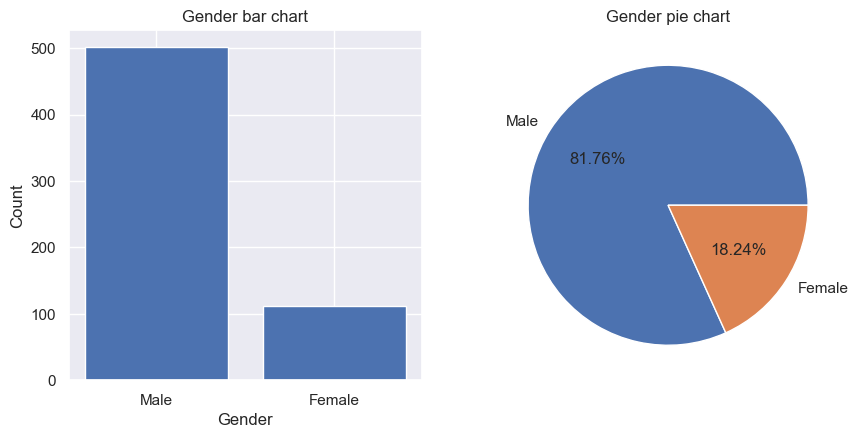

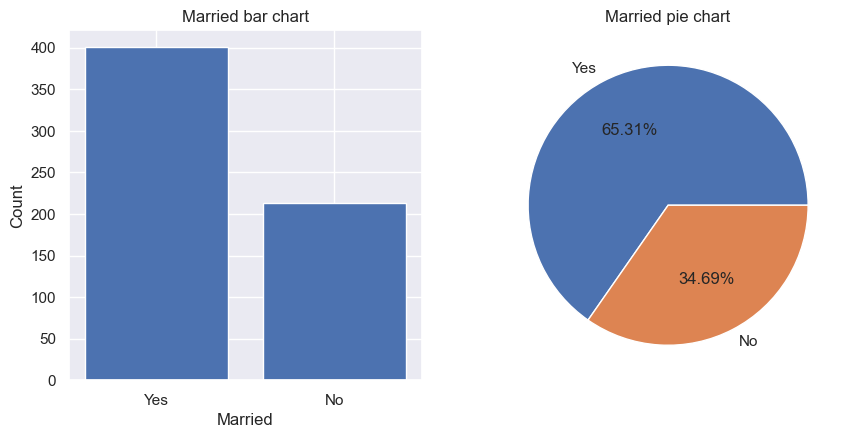

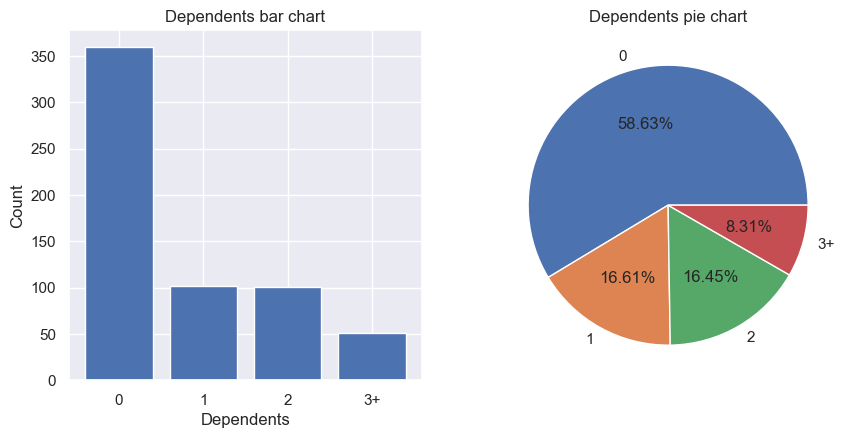

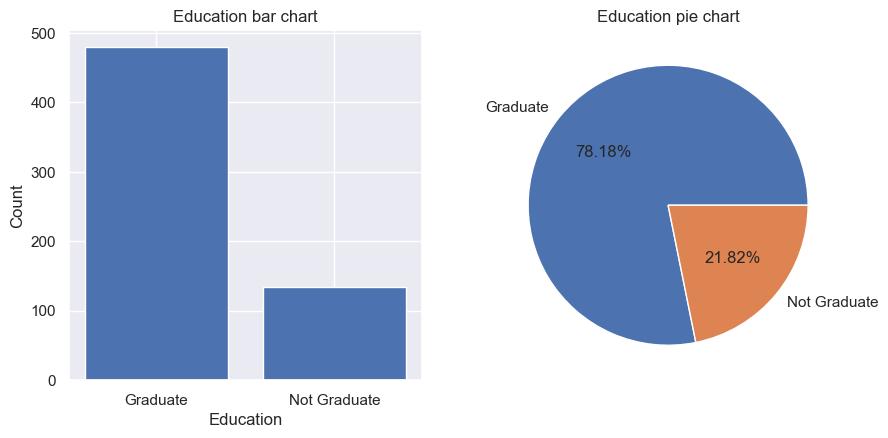

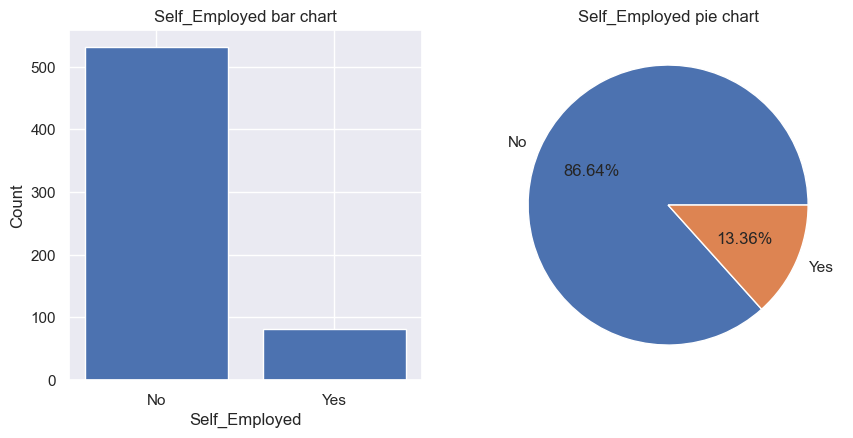

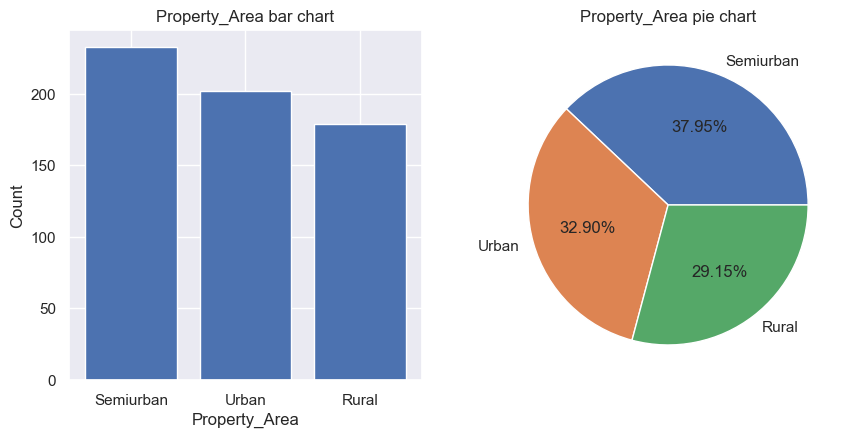

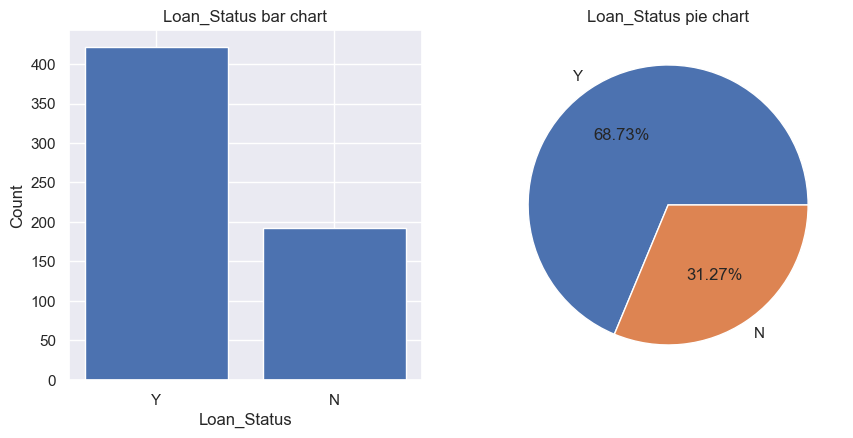

In [61]:
for column in c:
    
    l_df[column].value_counts()
    Property=l_df[column].value_counts().keys()
    count=l_df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()

**numerical data analysis**

In [63]:
n=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']
for i in n:
    d_count=round(l_df[i].count(),2)
    d_max=round(l_df[i].max(),2)
    d_min=round(l_df[i].min(),2)
    d_mean=round(l_df[i].mean(),2)
    d_median=round(l_df[i].median(),2)
    d_std=round(l_df[i].std(),2)
    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

ApplicantIncome count: 614
ApplicantIncome max: 81000
ApplicantIncome min: 150
ApplicantIncome mean: 5403.46
ApplicantIncome median: 3812.5
ApplicantIncome std: 6109.04
------------------------------------
CoapplicantIncome count: 614
CoapplicantIncome max: 41667.0
CoapplicantIncome min: 0.0
CoapplicantIncome mean: 1621.25
CoapplicantIncome median: 1188.5
CoapplicantIncome std: 2926.25
------------------------------------
LoanAmount count: 614
LoanAmount max: 700.0
LoanAmount min: 9.0
LoanAmount mean: 145.75
LoanAmount median: 128.0
LoanAmount std: 84.11
------------------------------------
Loan_Amount_Term count: 614
Loan_Amount_Term max: 480.0
Loan_Amount_Term min: 12.0
Loan_Amount_Term mean: 342.41
Loan_Amount_Term median: 360.0
Loan_Amount_Term std: 64.43
------------------------------------
Credit_History count: 614
Credit_History max: 1.0
Credit_History min: 0.0
Credit_History mean: 0.86
Credit_History median: 1.0
Credit_History std: 0.35
------------------------------------


In [64]:
n = ['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']  # Replace this with your actual list of column names or indices

for i in n:
    q1 = np.quantile(l_df[i], 0.25)
    q2 = np.quantile(l_df[i], 0.50)
    q3 = np.quantile(l_df[i], 0.75)
    print(i, 'q1:', q1)
    print(i, 'q2:', q2)
    print(i, 'q3:', q3)
    print('------------')


ApplicantIncome q1: 2877.5
ApplicantIncome q2: 3812.5
ApplicantIncome q3: 5795.0
------------
CoapplicantIncome q1: 0.0
CoapplicantIncome q2: 1188.5
CoapplicantIncome q3: 2297.25
------------
LoanAmount q1: 100.25
LoanAmount q2: 128.0
LoanAmount q3: 164.75
------------
Loan_Amount_Term q1: 360.0
Loan_Amount_Term q2: 360.0
Loan_Amount_Term q3: 360.0
------------
Credit_History q1: 1.0
Credit_History q2: 1.0
Credit_History q3: 1.0
------------


**histogram**

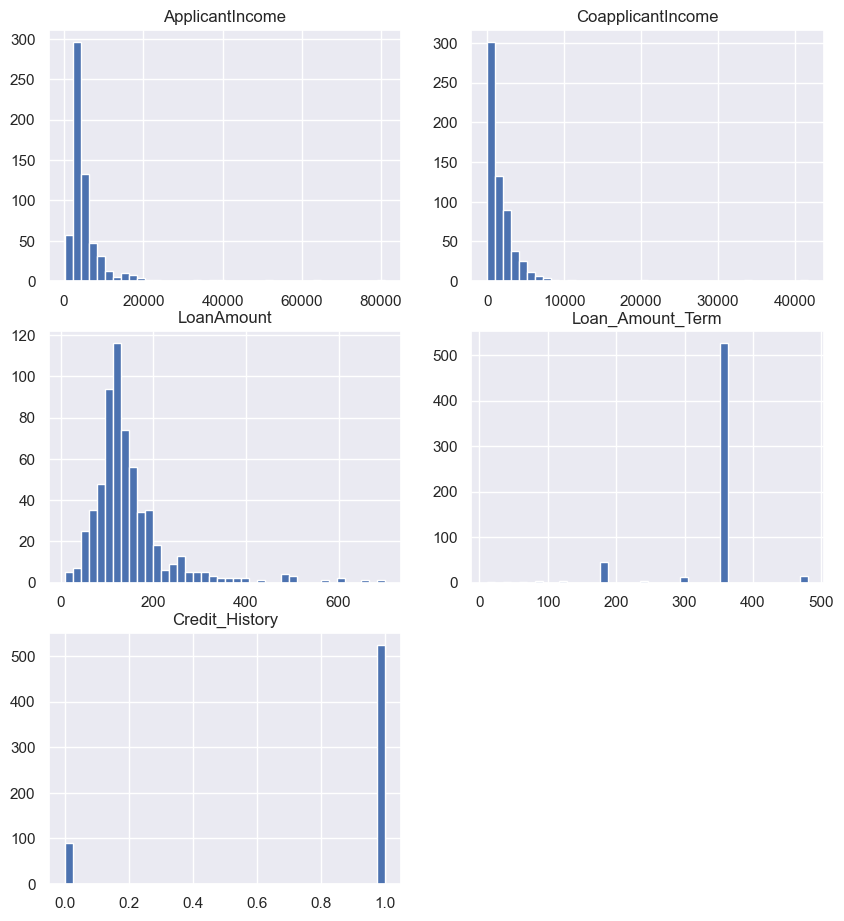

In [65]:
plt.figure(figsize=(10,15))
for i,column in enumerate(n):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(l_df[column],bins=40)
plt.show()

**empirical rule**

In [66]:
mean=l_df['ApplicantIncome'].mean()
std=l_df['ApplicantIncome'].std()

In [67]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=l_df['ApplicantIncome']>val_minus_1
con2=l_df['ApplicantIncome']<val_plus_1

ep1=len(l_df[con1&con2])
ep2=ep1/len(l_df)

con3=l_df['ApplicantIncome']>val_minus_2
con4=l_df['ApplicantIncome']<val_plus_2

ep3=len(l_df[con3&con4])
ep4=ep3/len(l_df)

con5=l_df['ApplicantIncome']>val_minus_3
con6=l_df['ApplicantIncome']<val_plus_3
ep5=len(l_df[con3&con4])
ep6=ep5/len(l_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9348534201954397
ep2: 0.9739413680781759
ep3: 0.9739413680781759


In [68]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=l_df['CoapplicantIncome']>val_minus_1
con2=l_df['CoapplicantIncome']<val_plus_1

ep1=len(l_df[con1&con2])
ep2=ep1/len(l_df)

con3=l_df['CoapplicantIncome']>val_minus_2
con4=l_df['CoapplicantIncome']<val_plus_2

ep3=len(l_df[con3&con4])
ep4=ep3/len(l_df)

con5=l_df['CoapplicantIncome']>val_minus_3
con6=l_df['CoapplicantIncome']<val_plus_3
ep5=len(l_df[con3&con4])
ep6=ep5/len(l_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.993485342019544
ep2: 0.993485342019544
ep3: 0.993485342019544


In [69]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=l_df['LoanAmount']>val_minus_1
con2=l_df['LoanAmount']<val_plus_1

ep1=len(l_df[con1&con2])
ep2=ep1/len(l_df)

con3=l_df['LoanAmount']>val_minus_2
con4=l_df['LoanAmount']<val_plus_2

ep3=len(l_df[con3&con4])
ep4=ep3/len(l_df)

con5=l_df['LoanAmount']>val_minus_3
con6=l_df['LoanAmount']<val_plus_3
ep5=len(l_df[con3&con4])
ep6=ep5/len(l_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [70]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=l_df['Credit_History']>val_minus_1
con2=l_df['Credit_History']<val_plus_1

ep1=len(l_df[con1&con2])
ep2=ep1/len(l_df)

con3=l_df['Credit_History']>val_minus_2
con4=l_df['Credit_History']<val_plus_2

ep3=len(l_df[con3&con4])
ep4=ep3/len(l_df)

con5=l_df['Credit_History']>val_minus_3
con6=l_df['Credit_History']<val_plus_3
ep5=len(l_df[con3&con4])
ep6=ep5/len(l_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


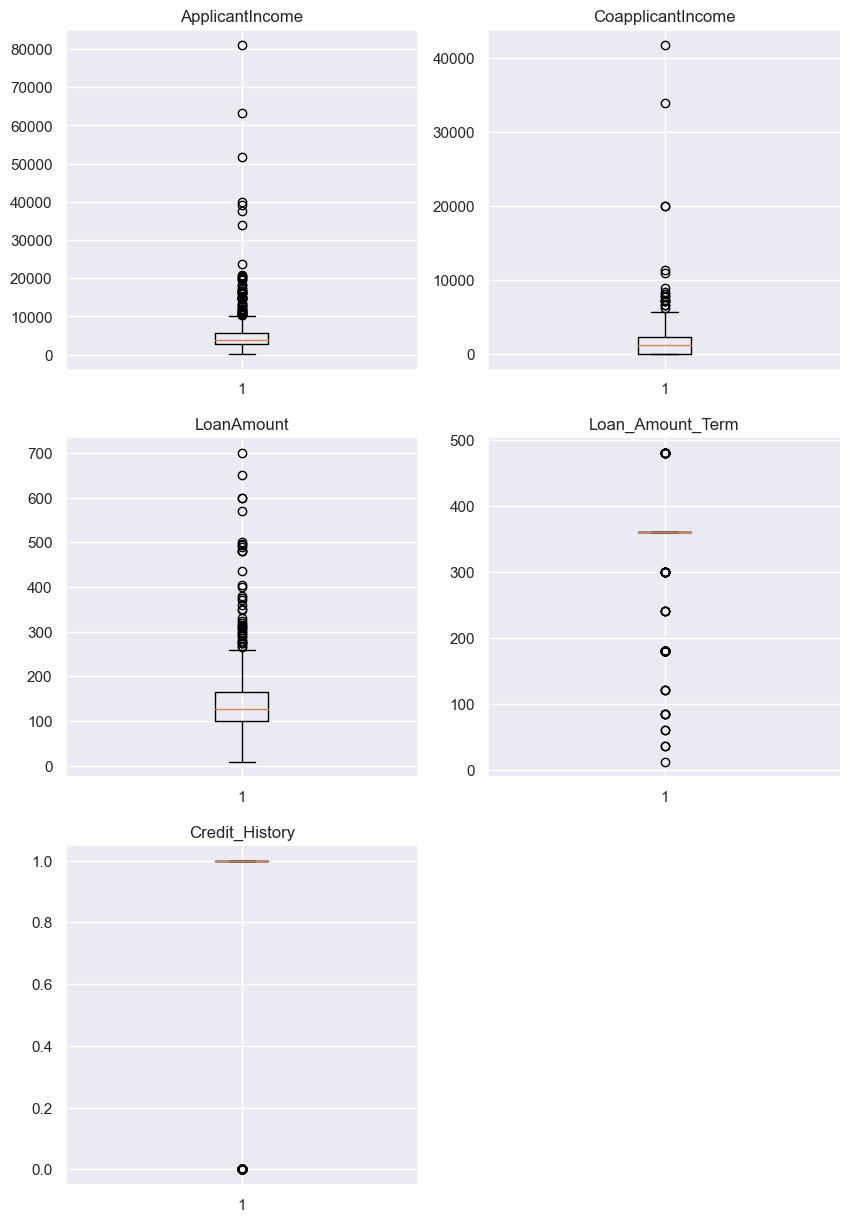

In [71]:
plt.figure(figsize=(10,15))
for i,column in enumerate(n):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(l_df[column])
plt.show()

In [72]:
q1=np.quantile(l_df['ApplicantIncome'],0.25)
q2=np.quantile(l_df['ApplicantIncome'],0.50)
q3=np.quantile(l_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=l_df['ApplicantIncome']>ub1
con2=l_df['ApplicantIncome']<lb1
outlier=l_df[con1|con2]
len(outlier)

50

In [73]:
q1=np.quantile(l_df['ApplicantIncome'],0.25)
q2=np.quantile(l_df['ApplicantIncome'],0.50)
q3=np.quantile(l_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=l_df['ApplicantIncome']<ub1
con2=l_df['ApplicantIncome']>lb1
non_outlier=l_df[con1&con2]
len(non_outlier)

564

In [74]:
v=(len(outlier)/len(l_df))*100
v

8.143322475570033

In [75]:
q1=np.quantile(l_df['CoapplicantIncome'],0.25)
q2=np.quantile(l_df['CoapplicantIncome'],0.50)
q3=np.quantile(l_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=l_df['CoapplicantIncome']>ub2
con2=l_df['CoapplicantIncome']<lb2
outlier2=l_df[con1|con2]
len(outlier2)

18

In [77]:
v=(len(outlier2)/len(l_df))*100
v

2.9315960912052117

In [79]:
q1=np.quantile(l_df['LoanAmount'],0.25)
q2=np.quantile(l_df['LoanAmount'],0.50)
q3=np.quantile(l_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=l_df['LoanAmount']>ub3
con2=l_df['LoanAmount']<lb3
outlier3=l_df[con1|con2]
len(outlier3)

41

In [80]:
q1=np.quantile(l_df['LoanAmount'],0.25)
q2=np.quantile(l_df['LoanAmount'],0.50)
q3=np.quantile(l_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=l_df['LoanAmount']<ub3
con2=l_df['LoanAmount']>lb3
non_outlier3=l_df[con1&con2]
len(non_outlier3)

573

In [78]:
q1=np.quantile(l_df['CoapplicantIncome'],0.25)
q2=np.quantile(l_df['CoapplicantIncome'],0.50)
q3=np.quantile(l_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=l_df['CoapplicantIncome']<ub2
con2=l_df['CoapplicantIncome']>lb2
non_outlier2=l_df[con1&con2]
len(non_outlier2)

596

In [84]:
l_df["CoapplicantIncome"]=np.clip(l_df['CoapplicantIncome'],lb2,ub2)

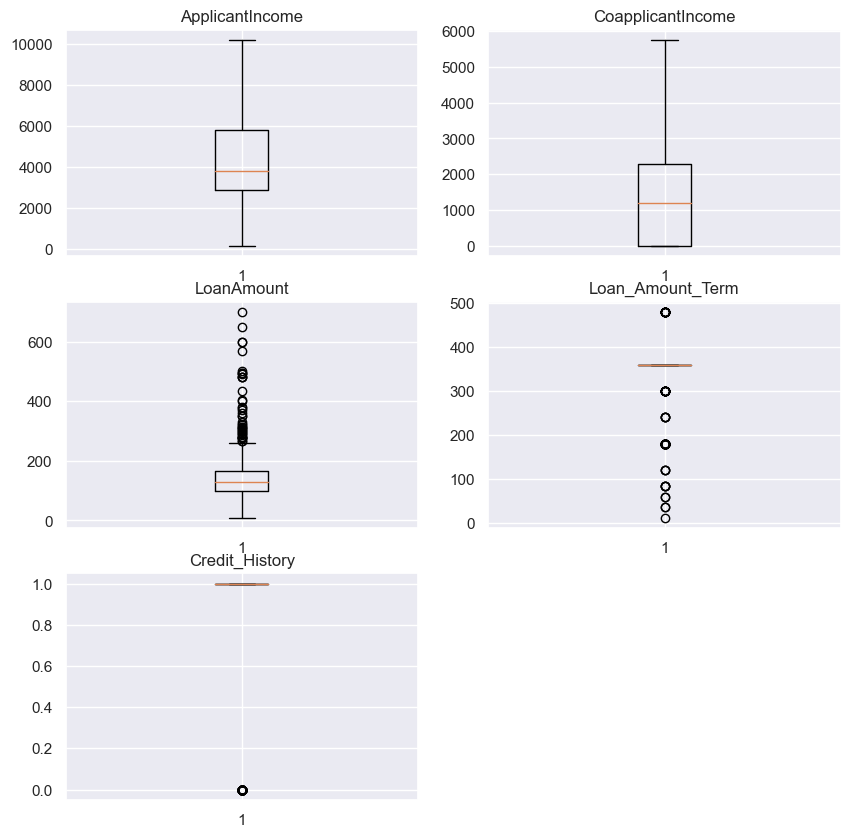

In [85]:
plt.figure(figsize=(10,10))
for i,column in enumerate(n):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(l_df[column])
plt.show()

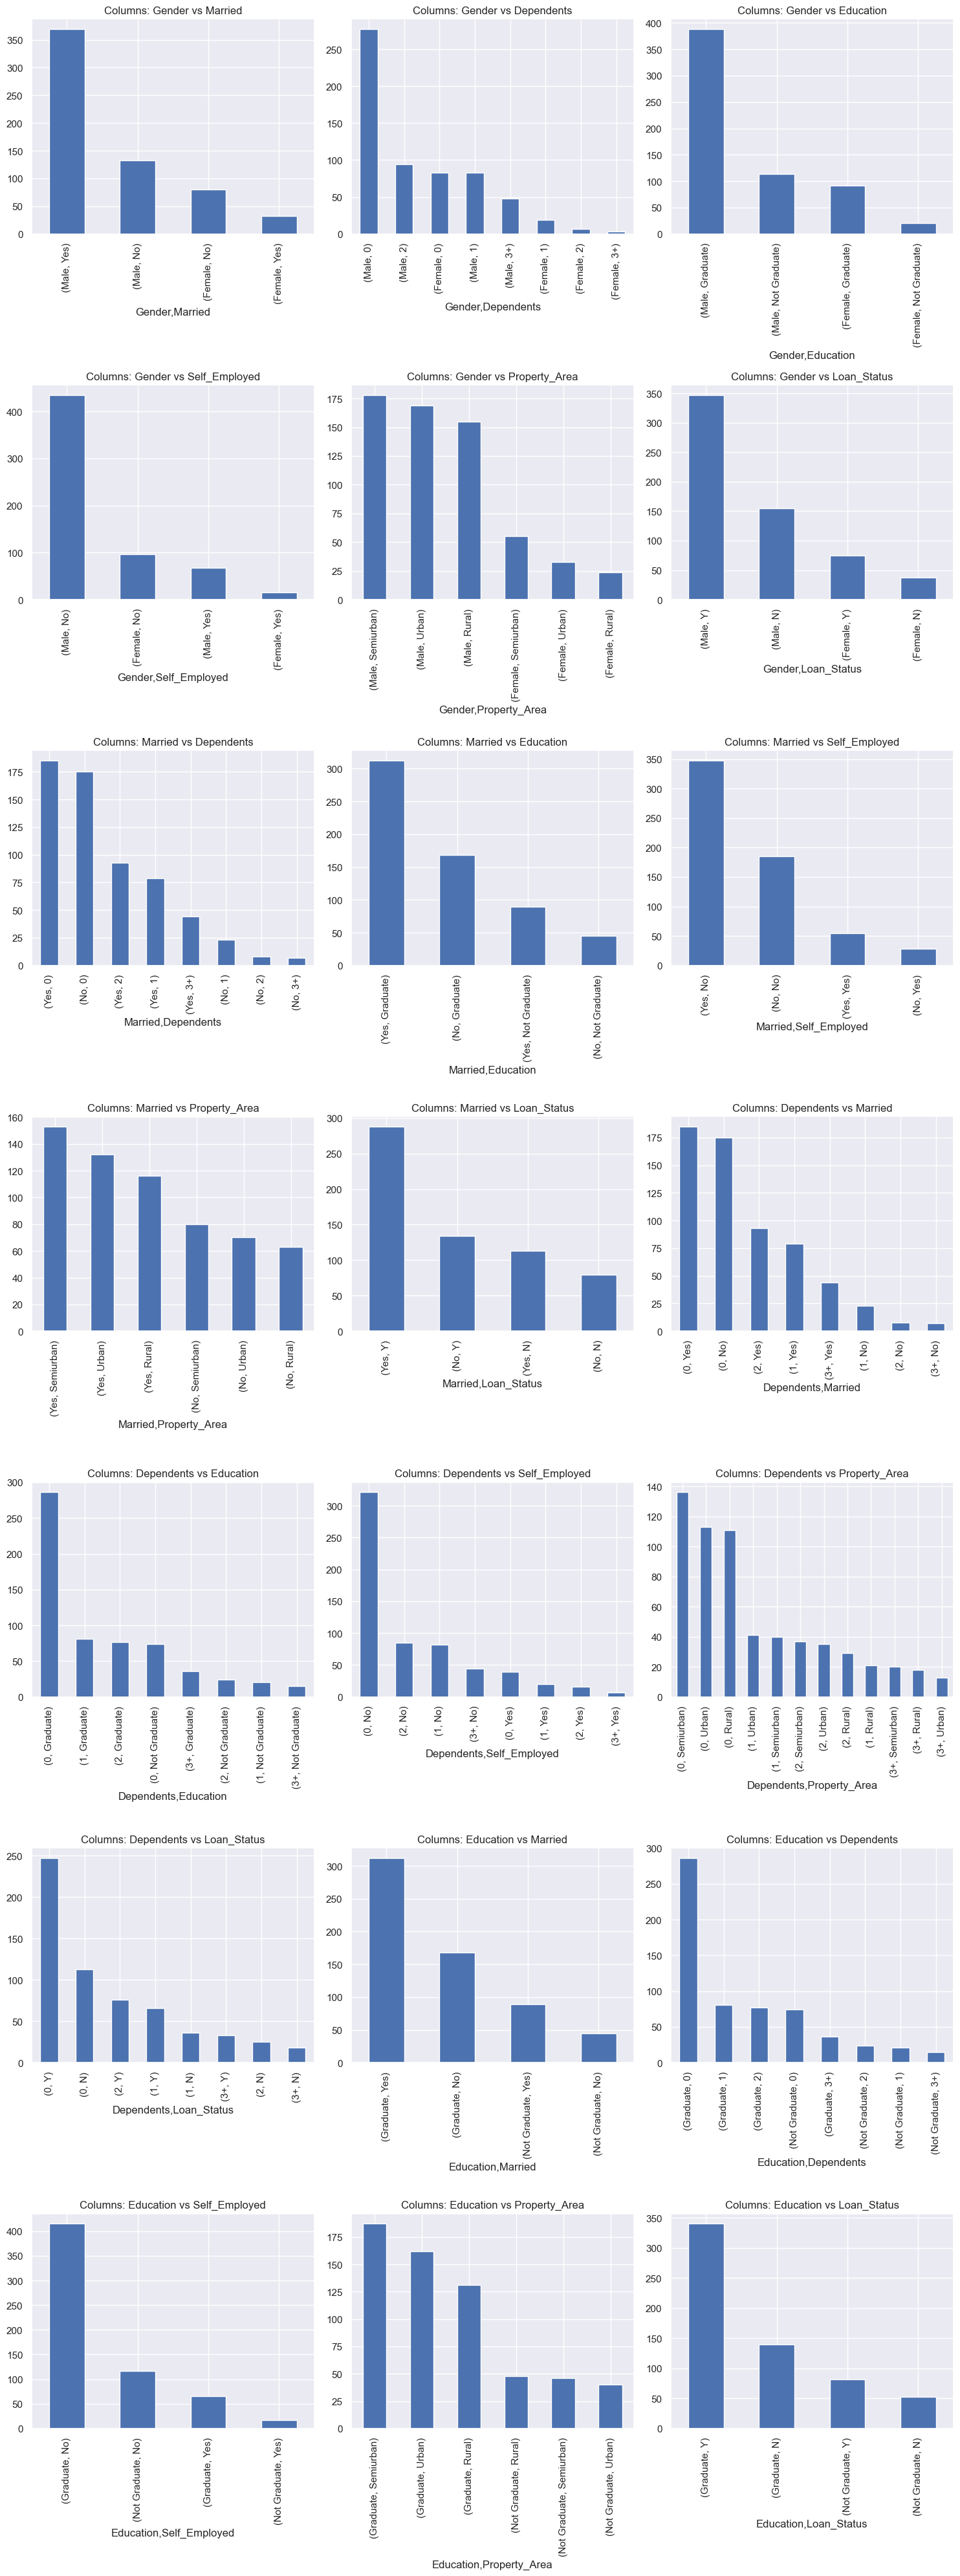

In [86]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7 * 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 40))  # 9 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in c:
    for j in c[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            l_df[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**multivariate**

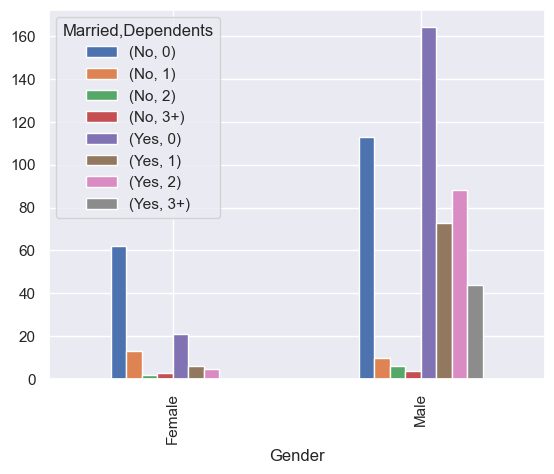

In [87]:
col1=l_df['Gender']
col2=l_df['Married']
col3=l_df['Dependents']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

**numerical vs numerical**

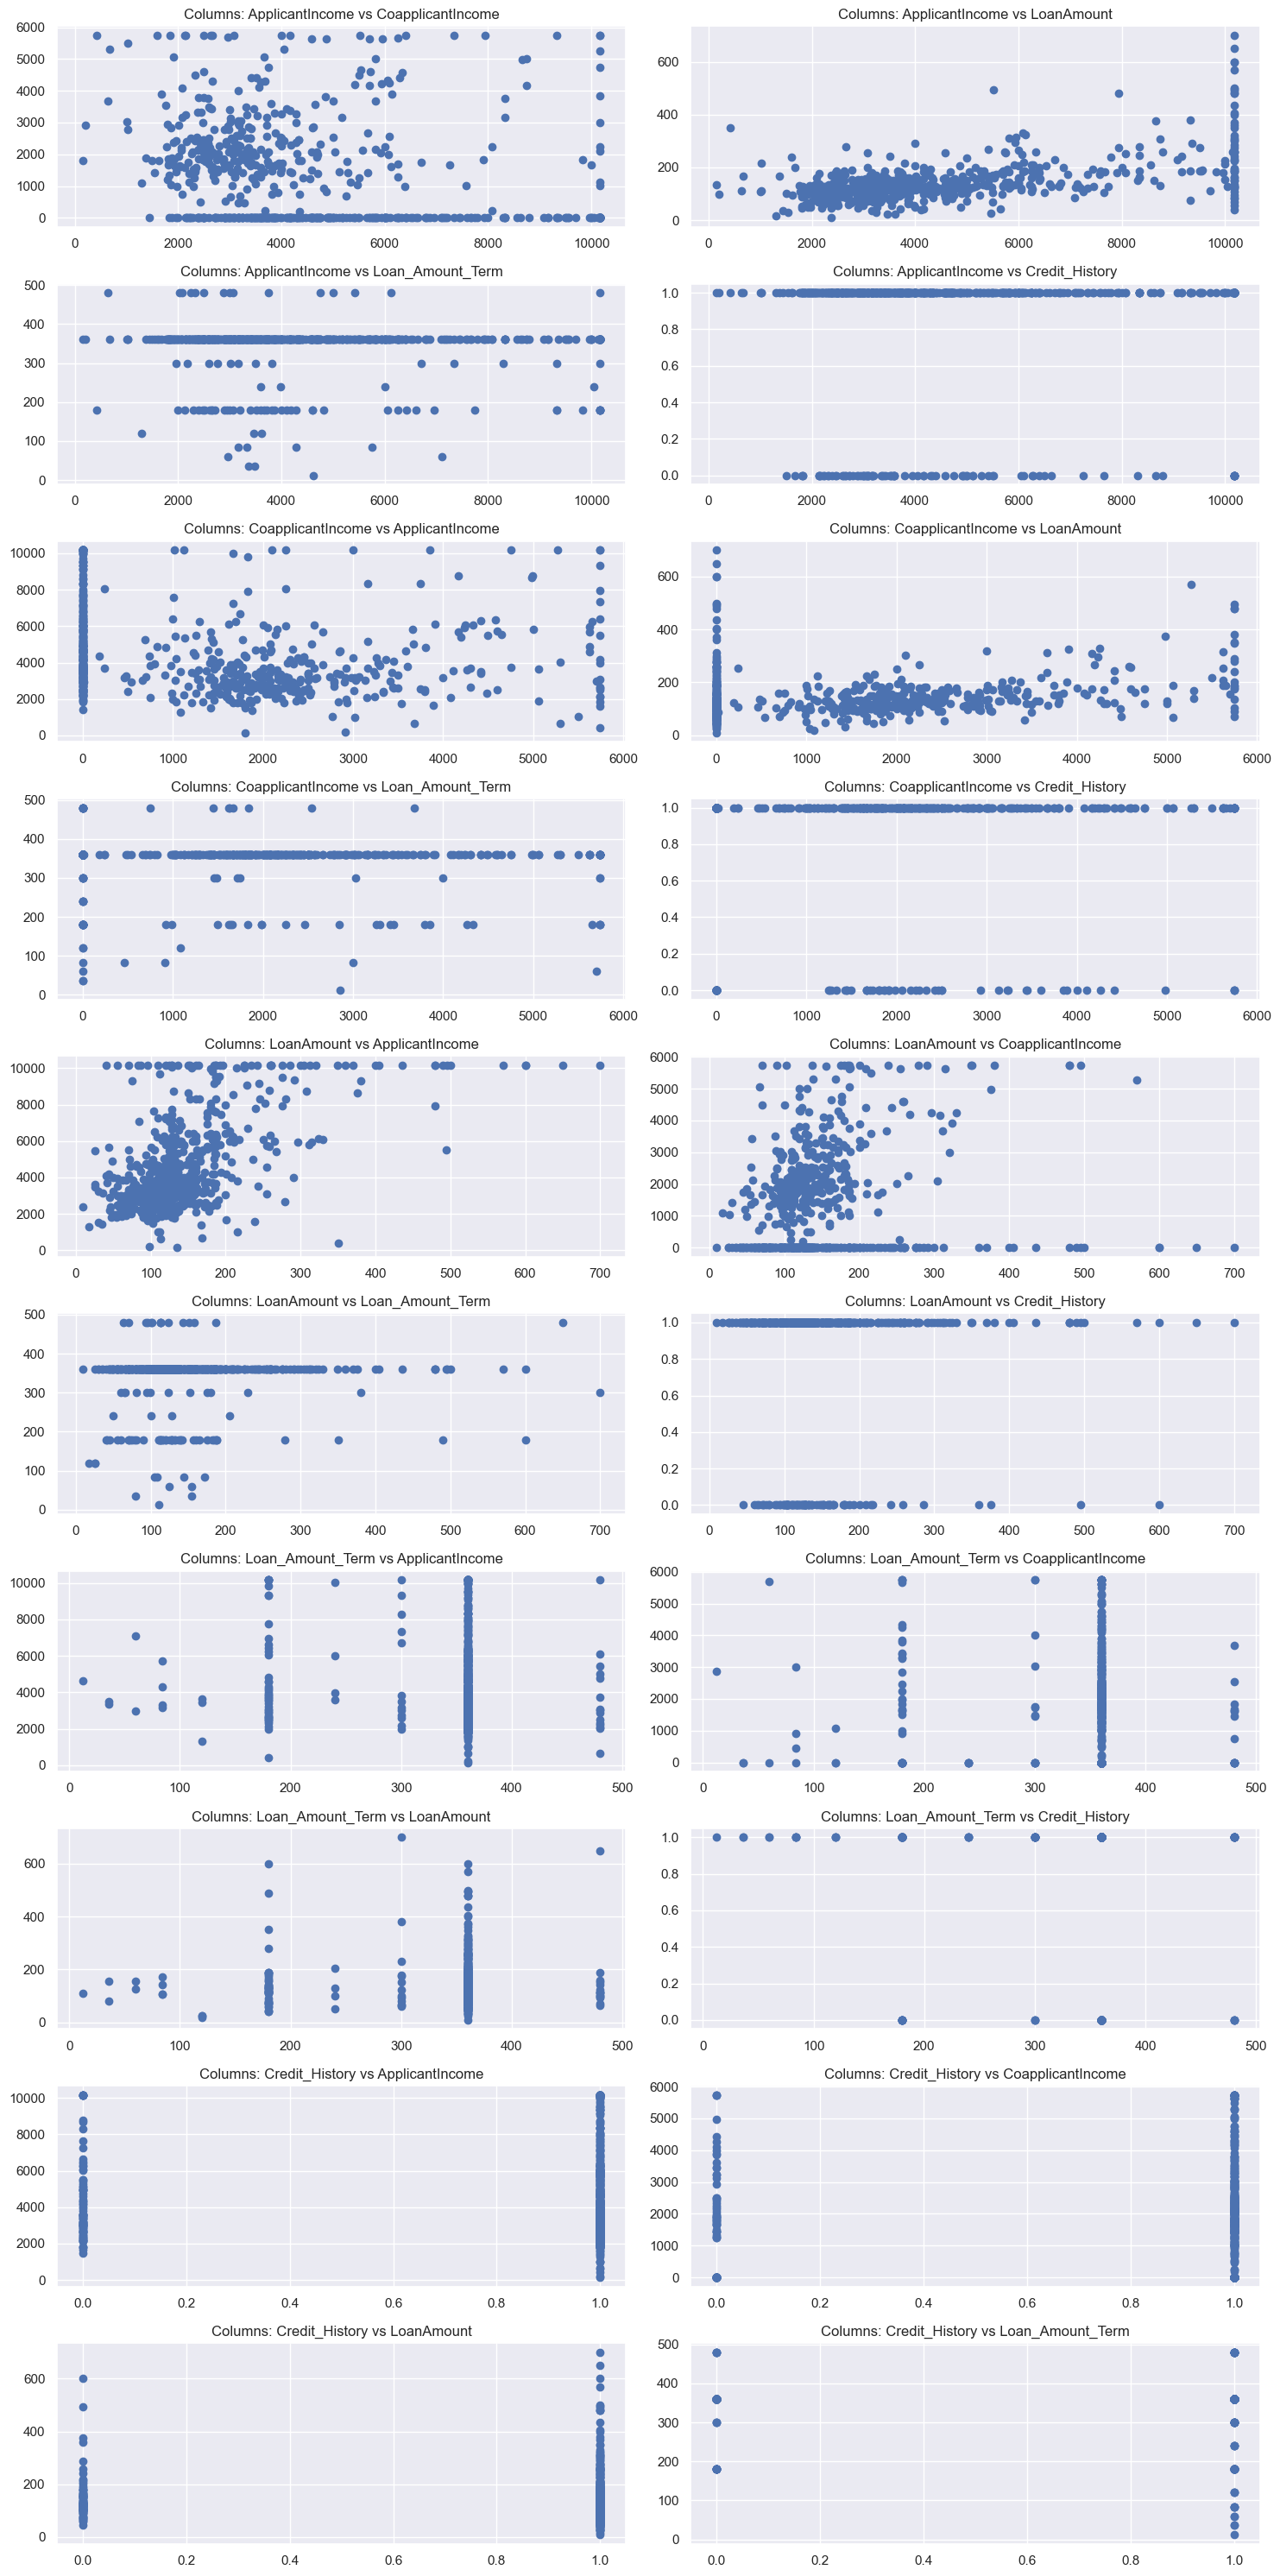

In [88]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in n:
    for j in n:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(l_df[i], l_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [89]:
corr=l_df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.228956,0.559780,-0.023926,0.035345
CoapplicantIncome,-0.228956,1.000000,0.203743,-0.029295,-0.001710
LoanAmount,0.559780,0.203743,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.023926,-0.029295,0.036960,1.000000,-0.004705
Credit_History,0.035345,-0.001710,-0.000607,-0.004705,1.000000


In [90]:
for i in (n):
    print(i,l_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 2.743052748820892
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


In [92]:
l_df['ApplicantIncome'] = np.log1p(l_df['ApplicantIncome'])

In [93]:
l_df['CoapplicantIncome']=np.log1p(l_df['CoapplicantIncome'])

In [94]:
l_df['LoanAmount']=np.log1p(l_df['LoanAmount'])

In [96]:
for i in c:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    l_df[i]=le.fit_transform(l_df[i])

In [97]:
l_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,2,1


**without hyper**

In [98]:
X=l_df.drop('Loan_Status',axis=1)

y=l_df['Loan_Status']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [102]:
print(l_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 12)
(491, 11)
(123, 11)
(491,)
(123,)


**dt**

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
y_pred_dt=dtree.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 66.67
F1 is: 0.74
Precision is: 0.8
Recall is: 0.68
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        39
           1       0.80      0.68      0.74        84

    accuracy                           0.67       123
   macro avg       0.64      0.66      0.64       123
weighted avg       0.70      0.67      0.68       123



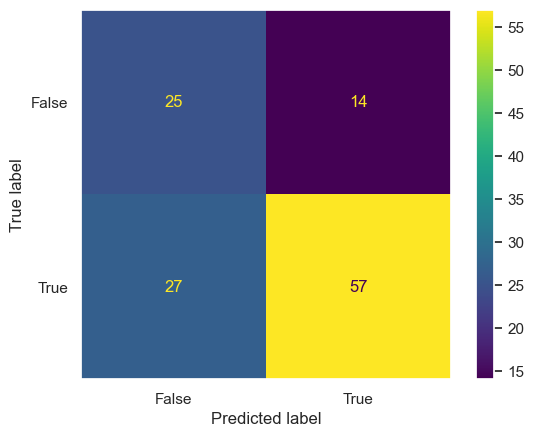

True negative: 25
False postive: 14
False negative: 27
True postive: 57


In [106]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

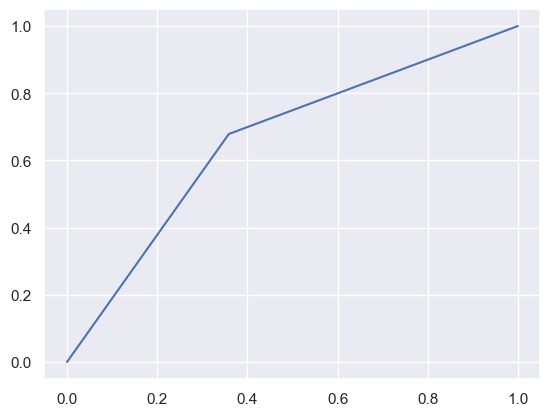

In [107]:
from sklearn.metrics import roc_curve
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**logistic**

In [108]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred_log=logtree.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 86.18
F1 is: 0.91
Precision is: 0.83
Recall is: 1.0


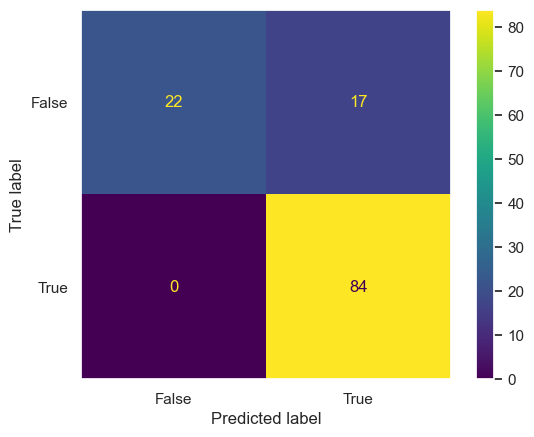

True negative: 22
False postive: 17
False negative: 0
True postive: 84


In [111]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

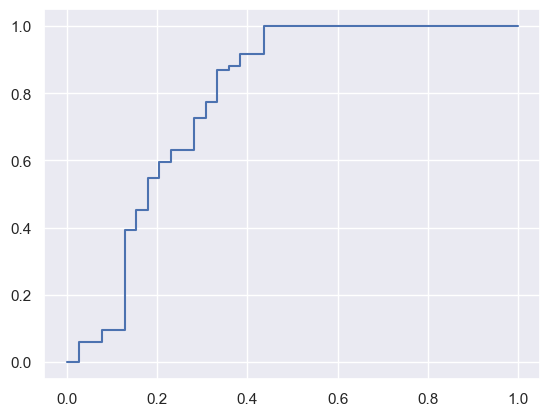

In [112]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**naive bayes**

In [113]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

GaussianNB()

In [114]:
y_pred_NB=NBtree.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 85.37
F1 is: 0.9
Precision is: 0.83
Recall is: 0.99


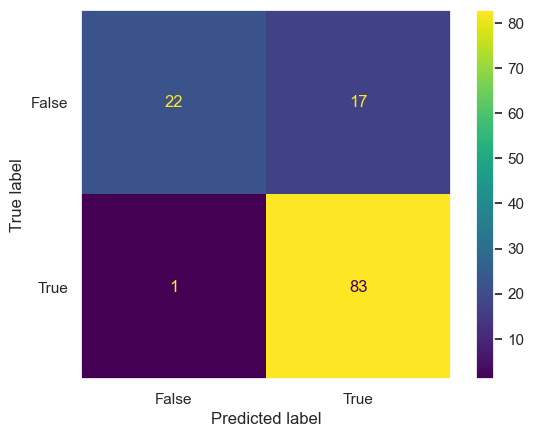

True negative: 22
False postive: 17
False negative: 1
True postive: 83


In [116]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

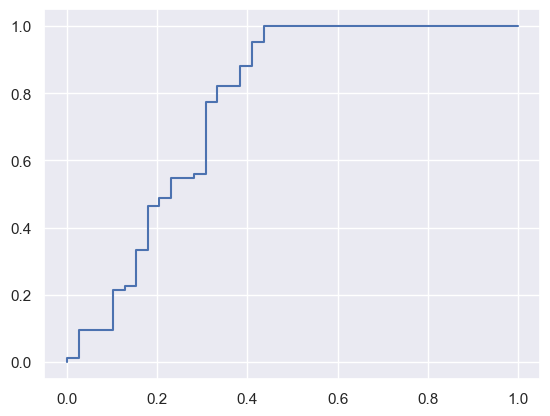

In [117]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**knn**

In [118]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
y_pred_KNN=KNNtree.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 72.36
F1 is: 0.82
Precision is: 0.74
Recall is: 0.92


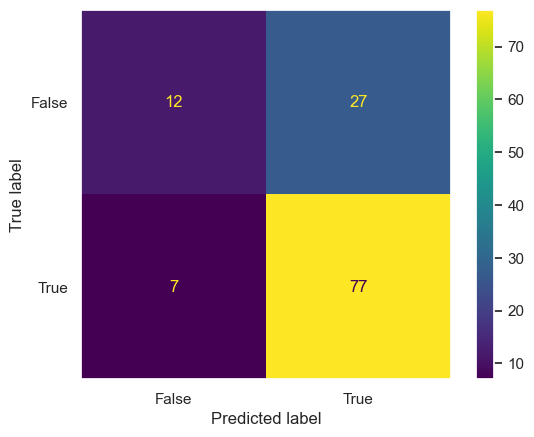

True negative: 12
False postive: 27
False negative: 7
True postive: 77


In [121]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

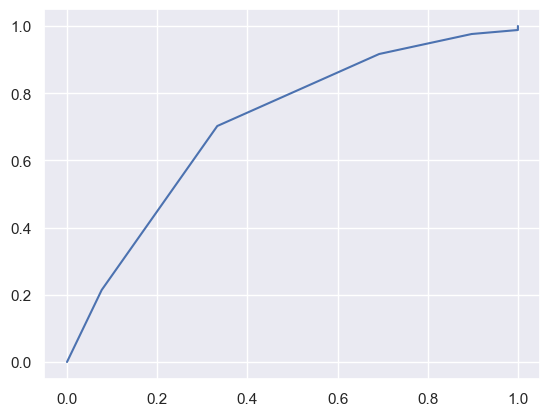

In [122]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**random forest**

In [123]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
y_pred_RF=RFtree.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 81.3
F1 is: 0.87
Precision is: 0.83
Recall is: 0.92


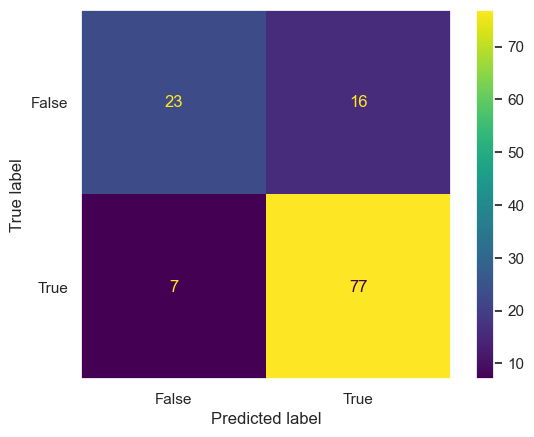

True negative: 23
False postive: 16
False negative: 7
True postive: 77


In [126]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

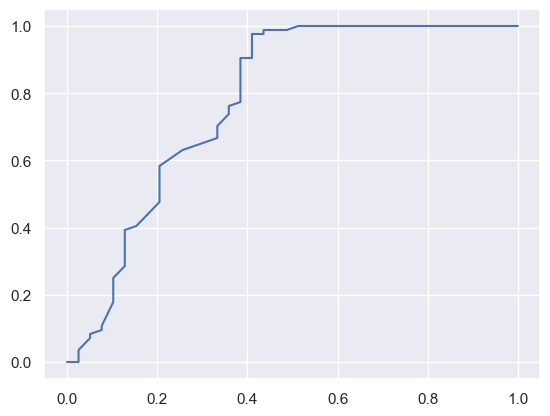

In [127]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [128]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,66.67,0.80,0.68,0.74
KNN,72.36,0.74,0.92,0.82
Logistic,86.18,0.83,1.00,0.91
Naive Bayes,85.37,0.83,0.99,0.90
Random Forest,81.30,0.83,0.92,0.87


**with hyper**

**dt**

In [129]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [130]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [131]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [132]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5],
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[2,3,4],
    "random_state":[0,42]
}

In [133]:
import time
start = time.time()
grid_search = GridSearchCV(grid_tree,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          verbose=True)
end= time.time()

print("Te total time taken is:",(end-start))

Te total time taken is: 0.015644550323486328


In [134]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [135]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
The total time taken is : 6.792344093322754


In [136]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state=0)

In [137]:
grid_search.best_score_

0.7963512677798392

In [138]:
grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [139]:
grid_search.best_index_


2

**best params**

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

**prediction**

In [141]:
y_pred_dt=dtree.predict(X_test)

In [142]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [143]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 76.42
F1 is: 0.83
Precision is: 0.81
Recall is: 0.86
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        39
           1       0.81      0.86      0.83        84

    accuracy                           0.76       123
   macro avg       0.73      0.71      0.72       123
weighted avg       0.76      0.76      0.76       123



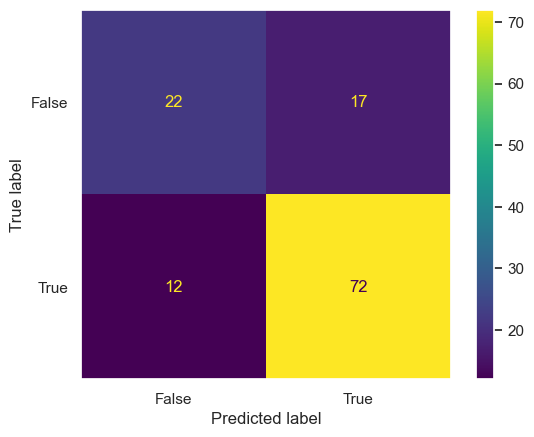

In [144]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [145]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 22
False postive: 17
False negative: 12
True postive: 72


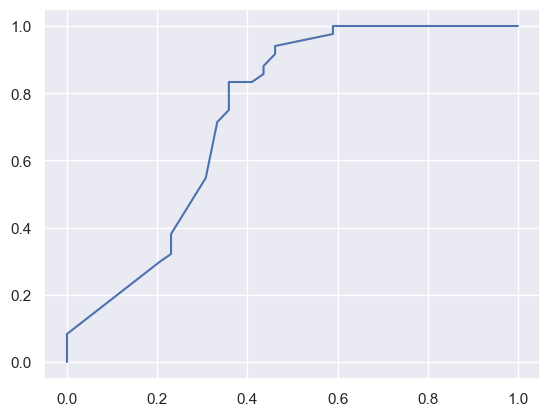

In [146]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [147]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
9,Credit_History,0.560918
5,ApplicantIncome,0.163541
6,CoapplicantIncome,0.101461
7,LoanAmount,0.101361
10,Property_Area,0.036562
8,Loan_Amount_Term,0.025555
0,Gender,0.010602
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000


**random forest**

In [148]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [149]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
RF_params=[keys for keys in grid_RF.get_params()]
print("available parameters for model :",RF_params)

available parameters for model : ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


In [150]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [ 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

In [151]:
grid_search = GridSearchCV(grid_RF,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

In [152]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The total time taken is : 79.37885808944702


In [153]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [155]:
grid_search.best_index_

0

In [156]:
grid_search.best_score_

0.7963512677798392

In [157]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, random_state=0)

**best params**

In [158]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 5,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [159]:
y_pred_RF=RFtree.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

In [161]:
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 81.3
F1 is: 0.87
Precision is: 0.83
Recall is: 0.92


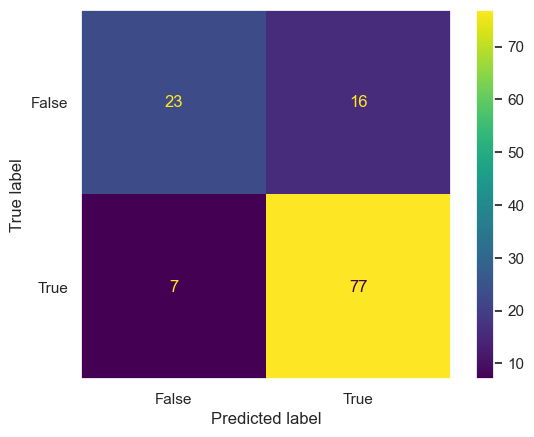

In [162]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [163]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 16
False negative: 7
True postive: 77


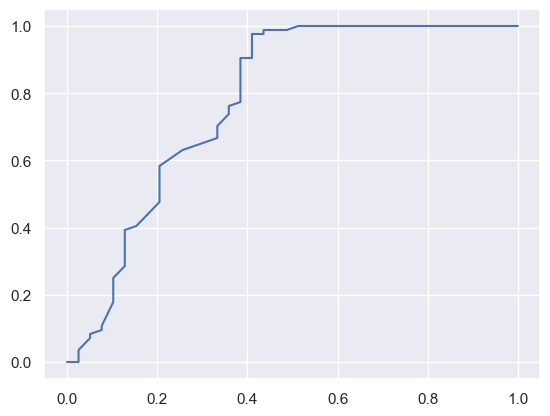

In [164]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**knn**

In [165]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [166]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
KNN_params=[keys for keys in grid_KNN.get_params()]
print("Parameter are:",KNN_params)

Parameter are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']


In [167]:
param_grid={
    'n_neighbors':[6,7,8,12],
    'leaf_size':[30,40,50,70],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [168]:
grid_search = GridSearchCV(grid_KNN,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

In [169]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 70],
                         'n_neighbors': [6, 7, 8, 12]},
             scoring='accuracy', verbose=True)

**best params**

In [170]:
grid_search.best_index_

3

In [171]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 12}

In [172]:
grid_search.best_score_

0.7210265924551639

In [173]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [174]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [175]:
y_pred_KN=KN.predict(X_test)

In [176]:
acc_KN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KN=round(f1_score(y_test,y_pred_KN),2)
precision_KN=round(precision_score(y_test,y_pred_KN),2)
recall_KN=round(recall_score(y_test,y_pred_KN),2)

print("accuray is:",acc_KN)
print("F1 is:",f1_KN)
print("Precision is:",precision_KN)
print("Recall is:",recall_KN)
print(classification_report(y_test,y_pred_KN))

accuray is: 70.73
F1 is: 0.81
Precision is: 0.73
Recall is: 0.9
              precision    recall  f1-score   support

           0       0.58      0.28      0.38        39
           1       0.73      0.90      0.81        84

    accuracy                           0.71       123
   macro avg       0.65      0.59      0.59       123
weighted avg       0.68      0.71      0.67       123



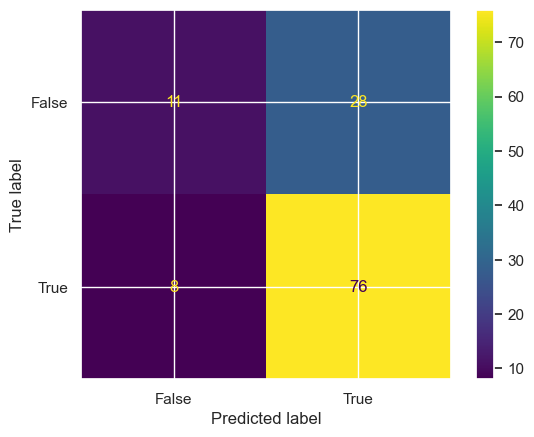

In [177]:
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [178]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 11
False postive: 28
False negative: 8
True postive: 76


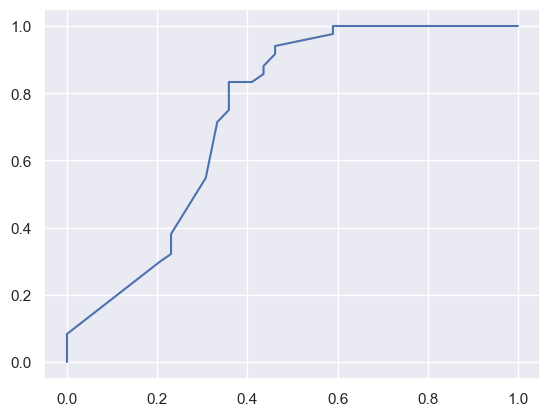

In [179]:
y_KN_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KN_pred_prob) 
plt.plot(fpr,tpr)

**naive bayes**

In [180]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [181]:
from sklearn.model_selection import GridSearchCV,cross_val_score
NB=GaussianNB()
NB

GaussianNB()

In [182]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [183]:
NB_params=[keys for keys in NB.get_params()]
NB_params

['priors', 'var_smoothing']

In [184]:
param_grid={
    'priors': [None, 'entropy'],
    'var_smoothing':[0.005]
}

In [185]:
grid_search = GridSearchCV(NB,  
                           param_grid, # params 
                           scoring='accuracy',
                           cv=4,
                          verbose=True) # cross validation


In [186]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None, 'entropy'], 'var_smoothing': [0.005]},
             scoring='accuracy', verbose=True)

In [187]:
grid_search.best_index_

0

In [188]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [189]:
grid_search.best_score_

0.6618852459016393

In [190]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.005)

**best paramss**

In [191]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.005)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.005)

In [192]:
y_pred_NB=NB.predict(X_test)

In [193]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)
print(classification_report(y_test,y_pred_NB))

accuray is: 65.85
F1 is: 0.79
Precision is: 0.68
Recall is: 0.96
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      0.96      0.79        84

    accuracy                           0.66       123
   macro avg       0.34      0.48      0.40       123
weighted avg       0.46      0.66      0.54       123



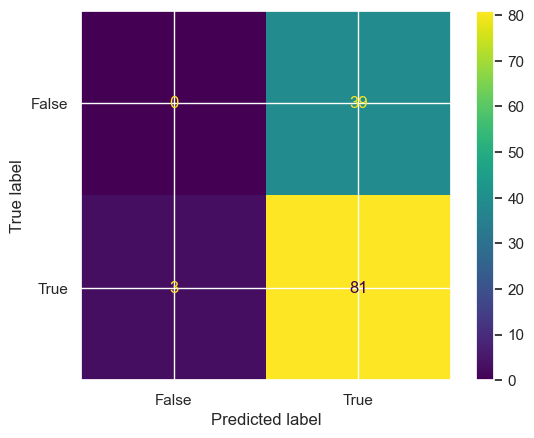

In [194]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [195]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 0
False postive: 39
False negative: 3
True postive: 81


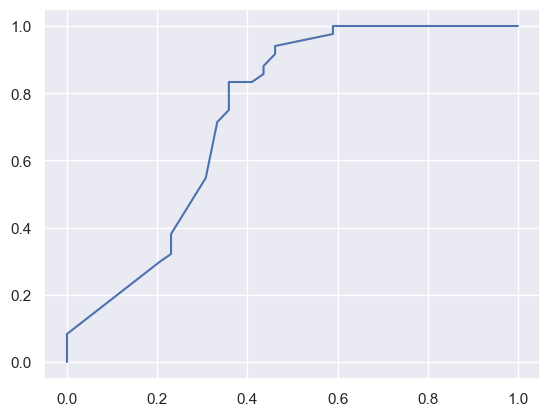

In [196]:
y_NB_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**log**

In [197]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [198]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [199]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [200]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [201]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [202]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [203]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [204]:
grid_search.best_index_

1

In [205]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [206]:
grid_search.best_score_

0.773973743835799

In [207]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=42)

In [208]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [209]:
y_pred_log=log.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

In [211]:
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 82.11
F1 is: 0.88
Precision is: 0.8
Recall is: 0.98


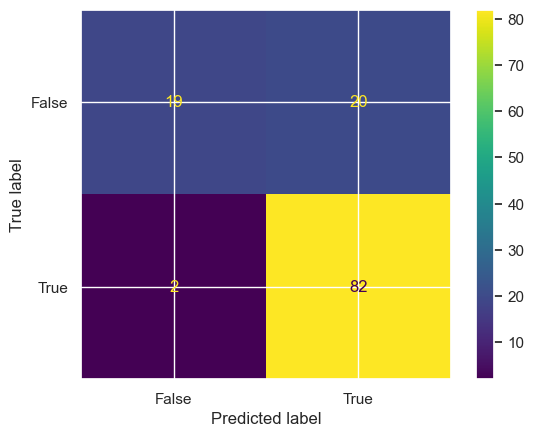

In [212]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [213]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 19
False postive: 20
False negative: 2
True postive: 82


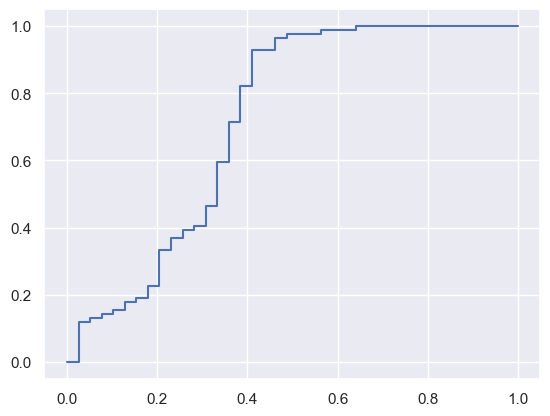

In [214]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [215]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
    "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['Decision Tree','K nearest Neighbour','Logistic Regression ','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,76.42,0.81,0.86,0.83
K nearest Neighbour,72.36,0.74,0.92,0.82
Logistic Regression,82.11,0.80,0.98,0.88
Naive Bayes,65.85,0.68,0.96,0.79
Random Forest,81.30,0.83,0.92,0.87


In [216]:
import pickle
pickle.dump(log,open("loan_best_model",'wb'))

In [217]:
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])